# The Most Important Models of Your Data Science Career

TODO: Talk about the value prop of this lecture, how this will talk about when to use what, overview of the three models covered

TODO: Talk about interpretability vs. predictive power

In [9]:
model_names = ['Linear Regression', 'Decision Trees', 'Random Forests']
predictive_power = [50, 60, 90]
interpretability = [100, 90, 60]
test = pd.DataFrame({'Model': model_names, 'Predictive Power': predictive_power, 'Interpretability': interpretability})

sns.scatterplot(x='Predictive Power', y='Interpretability', hue='Model', data=test)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

## Linear Models: Linear Regression and Logistic Regression

<img src="https://raw.githubusercontent.com/JeffMacaluso/Talks/master/TheMostImportantModels/images/LinearRegression.png" width="500">


### What are they?

Linear and logistic regression are known as linear models. They are the first models that are taught in the world of machine learning because they are simple, a fundamental building block, and extremely powerful. These models are used in many other fields - statistics, econometrics, finance, experimentation, etc., so you may have already know about them. These are going to be the most common models you will use because you should always train a linear model as a baseline when approaching any traditional machine learning problem. This is because they are extremely quick to train, don't require intense hyperparameter tuning, and they will help you understand what kind of reasonable performance you can obtain. Remember, in the real world, the time spent hyperparameter tuning more complex models is often better spent cleaning messy data. TODO: Reword this last sentence

**Linear Regression**

Also referred to as **o**rdinary **l**east **s**quares (OLS), ordinary regression, either univariate or multivariate regression (depending on how many features/predictors you are using), etc. This is a simple regression model that is used to predict numbers, or a continuous variable, by fitting a line (**line**ar regression) through data points.

**Logistic Regression**

Also referred to as a **g**eneralized **l**inear **m**odel (GLM). This is very similar to linear regression, but it is used to predict classes - the "regression" part of the name is a bit of a misnomer because logistic regression is not used to predict numbers. The formula, coefficient interpretation, optimization techniques, and cost functions are different, but from a high level you can think of logistic regression as being similar to linear regression but having an output that is restricted between 0 and 1. The predictions from our trained model will be a probability of belonging to a specific class.

### How do they work?

At a high level, linear models try to fit a line through observations in a way that minimizes the [error](https://en.wikipedia.org/wiki/Errors_and_residuals), or the distance from the observation to the line from our model. This can be done in a closed form solution with the [normal equation](http://mlwiki.org/index.php/Normal_Equation), or it can be done with an optimization algorithm.

Below is an example of fitting a univariate (only one feature/predictor/variable) linear regression model with [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent), an optimization model that minimizes error by taking a series of "steps" to decrease the error. If you are interested in the math behind this, you can see [this notebook](https://nbviewer.jupyter.org/github/JeffMacaluso/Misc/blob/master/MachineLearningMOOC/Ex1%20Python%20-%20Linear%20Regression.ipynb) for implementing linear regression with both the normal equation and gradient descent from scratch.

<img src="https://raw.githubusercontent.com/JeffMacaluso/Talks/master/TheMostImportantModels/images/LinearRegressionGradientDescent.gif" width="1200">

*Animation credit: Alykhan Tejani*

We'll skip over logistic regression for purpose of time, but many of the concepts are the same.

### Linear Regression Example

In this section we'll train our first linear regression on a dataset that will let us predict the fuel economy of a car based off of several attributes. We'll then talk about why a linear model should always be used as a baseline, how interpretable they are, and some of the weaknesses of linear regression if we aren't careful with our data.

First, starting with importing some standard Python libraries for data science. These should all be included with the Anaconda distribution of Python, and you should absolutely install them if you don't have them.

In [1]:
# Overall setup with library imports and notebook settings
import time  # For timing model training
import numpy as np  # Multidimensional arrays
import pandas as pd  # Data frames & manipulation (built on NumPy)
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Plotting (built on matplotlib)
import sklearn  # Machine learning
from sklearn.model_selection import train_test_split  # Splitting data between the training and testing set

# Rendering plots within the Jupyter notebook
%matplotlib inline

Next, importing our dataset of the cars and previewing the first few rows:

In [2]:
# Importing the dataset
df = sns.load_dataset('mpg').dropna()
print('Data frame shape:', df.shape)  # Reporting on the number of observations
df.head()  # Previewing the data frame

Data frame shape: (392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**Fitting the model & Why linear models should always be used as baselines**

We'll fit our model and time how long it takes to do so, and then compare it against a neural network. We'll measure the performance of our models with both training time and the [Root Mean Square Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) of the testing set using the hold-out method. This means that we will use 70% of our data to train our models, create predictions on the remaining the 30% of the data, and test our predictions by comparing them against the actual data.

On a side note, you should typically use [k-fold cross validation](https://cdn-images-1.medium.com/max/1600/1*me-aJdjnt3ivwAurYkB7PA.png) when you have a small dataset (typically <300,000 observations) in order to have a more realistic evaluation, but we'll skip this for the sake of time and explainability.

Before we do, think about what you expect the differences between these two models should be. Which one do you think should perform better?

In [3]:
from sklearn.linear_model import LinearRegression

# Assigning the features and labels to variables before splitting them
# Note: We're discarding the origin (discrete/categorical variable) and model_year (ordinal)
#       for simplicity in this example.
features = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
label = df['mpg']

# Splitting the observations into a training and a testing set for the holdout method
# Note: k-folds cross validation should be used for a dataset this small in order
#       to obtain a more realistic accuracy. This won't be used for simplicity
#       in this example.
X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.30, random_state=46)

# Instantiating the model
linear_regression_model = LinearRegression()

# Fitting the model and timing how long it takes
start_time = time.time()
linear_regression_model.fit(X_train, y_train)
end_time = time.time()

# Calculating the root mean squared error (RMSE) of our model
predictions = linear_regression_model.predict(X_test)  # Creating predictions for the test set
mse = sklearn.metrics.mean_squared_error(y_test, predictions)  # Calculating the mean squared error
rmse = np.sqrt(mse)  # Getting the square root of the mean squared error

# Reporting how long it takes to fit the model
print('Total time to fit the model:', end_time - start_time)

# Reporting the root mean squared error (RMSE)
print('RMSE:', rmse)

Total time to fit the model: 0.003000974655151367
RMSE: 4.599514481691386


We were able to fit our model in a centisecond - that's really fast. Our model was off on our test set by an average of 4.6 MPG.

In order to prove why it's a good idea to use either linear or logistic regression as a baseline model, we'll copy and paste the code in the chunk above but use a neural network instead. Neural networks are a complex model that loosely models the biological structure of the brain. They can be extremely powerful when used in the right context (image classification, natural language processing, speech to text, etc.) and with extensive hyperparameter tuning, but this should demonstrate why there's no one model that fits all use cases.

In [4]:
from sklearn.neural_network import MLPRegressor

# Instantiating the model
neural_network_model = MLPRegressor(max_iter=1000,  # Allowing a higher number of max iterations to allow it to converge
                                    random_state=46)  # Ensuring the same results every time

# Fitting the model and timing how long it takes
start_time = time.time()
neural_network_model.fit(X_train, y_train)
end_time = time.time()

# Calculating the root mean squared error (RMSE) of our model
predictions = neural_network_model.predict(X_test)  # Creating predictions for the test set
mse = sklearn.metrics.mean_squared_error(y_test, predictions)  # Calculating the mean squared error
rmse = np.sqrt(mse)  # Getting the square root of the mean squared error

# Reporting how long it takes to fit the model
print('Total time to fit the model:', end_time - start_time)

# Reporting the root mean squared error (RMSE)
print('RMSE:', rmse)

Total time to fit the model: 0.05899930000305176
RMSE: 10.285381501709422


Not only did our neural network take ~61x as long to train, but it's RMSE was significantly worse. It's possible that we could have obtained a better performing neural network by extensively tuning the network architecture, learning rate, optimizer, regularization parameters, etc., but this would have been a significant time investment.

The other reason why linear models are exceptionally powerful is that they are highly interpretable. If we want to understand *why* a neural network is making the prediction that it's making, we don't really know - it's a [black box model](https://en.wikipedia.org/wiki/Black_box). We also don't know which features are important and by how much. These are easy to do with linear models because the trained model is just an extremely simple math equation - 

$$\hat{Y} = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + ... \theta_n X_n$$

where

$$\hat{Y}: Prediction$$
$$\theta_0: Intercept$$
$$\theta_{1 \dots n}: Coefficients$$
$$X_{1 \dots n}: Variables/Features/Predictors$$

Let's look at the equation for our model here. In this case, we'll re-fit the model with the statsmodels library in order to better format the results and have additional information for the model available to us - 

In [5]:
import statsmodels.api as sm

# Adding the intercept constant for the statsmodels API
X_train_for_statsmodels_api = sm.add_constant(X_train, prepend=False)

# Fitting the model and viewing the model summary
mod = sm.OLS(y_train, X_train_for_statsmodels_api)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sat, 16 Mar 2019   Prob (F-statistic):           6.32e-72
Time:                        18:06:54   Log-Likelihood:                -771.96
No. Observations:                 274   AIC:                             1556.
Df Residuals:                     268   BIC:                             1578.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4716      0.472     -0.999   

There is a lot going on in the output, but we'll only focus on the coefficients. The p-values (P>|t|) generally give us the confidence in our coefficients, but we'll ignore these for the sake of time.

The coefficients tell us what to multiply our features by in order to get our output. The way of interpreting them is that for every increase in the feature by 1 (holding all else equal), the label changes by the coefficient. Putting that in terms of our model in order to make it less abstract, if we refer to the horsepower in the output of our model, for every increase of one horsepower and nothing else, a car's MPG will decrease by 0.0555, increasing the weight by one decreases the MPG by 0.0043, and so on. Making this even more concrete, here is the formula our model gives us (ignoring that not all of the coefficients are statistically significant):

$$\hat{MPG} = 47.3703 - (Cylinders * 0.4716) - (Displacement * 0.0042) - (Horsepower * 0.0555) - (Weight * 0.0043) - (Acceleration * 0.1263)$$

Just for fun, we can test this with our own cars. Plug in your car's specifications below and see how close it is!

In [6]:
# Plug in your own car's specifications here
cylinders = 4
displacement = 152  # In inches
horsepower = 173
weight = 3085
acceleration = 7.3  # 0-60 time in seconds


# The order must be the same as the data frame you used to train the model
own_car = [cylinders, displacement, horsepower, weight, acceleration]

# Re-shaping the input for sklearn to predict on
own_car = np.array(own_car).reshape(1, -1)

# Predicting your car's MPG
linear_regression_model.predict(own_car)

array([21.0201357])

That's almost exactly what the EPA's combined MPG estimate is for my car - all from a linear regression model on only 392 other cars from the '70s and '80s!

So at this point linear regression seems really cool - it trains really fast, had better predictive performance than an un-tuned neural network, and it was able to tell us why it was making its predictions and how much each feature matters. However, you may have noticed that I used a few specific phrases such as "holding all else equal" and "ignoring that not all of the coefficients are statistically significant".

Because linear regression is a more basic model, it requires [more assumptions](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/) in order to work properly. It isn't as robust as other models, so we have to be careful with our data before making claims about which features matter and how much. Additionally, there are a lot more things in our data that we have to be careful about.

Let's examine some new data that we will build linear models for. This will be four datasets, each with only one feature. We'll start by loading the datasets in and viewing summary statistics for the single features.

In [7]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset('anscombe')

# Showing same mean/sd/percentiles for the predictor
df.groupby('dataset')['x'].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
I,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
II,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
III,11.0,9.0,3.316625,4.0,6.5,9.0,11.5,14.0
IV,11.0,9.0,3.316625,8.0,8.0,8.0,8.0,19.0


The summary statistics all look almost the exact same. It's possible that datasets I-III are duplicates and IV happens to be a little different.

Next, we'll build one model for each of these datasets and examine the RMSE:

In [8]:
# Looping through each dataset, building a model, and checking the RMSE
for dataset in df['dataset'].unique():
    subset = df[df['dataset'] == dataset]
    model = LinearRegression()
    model.fit(subset[['x']], subset['y'])
    predictions = model.predict(subset[['x']])
    
    mse = sklearn.metrics.mean_squared_error(subset['y'], predictions)
    rmse = np.sqrt(mse)
    print('Dataset {0} RMSE: {1}'.format(dataset, rmse))

Dataset I RMSE: 1.1185497916336298
Dataset II RMSE: 1.1191023557497446
Dataset III RMSE: 1.118285693623049
Dataset IV RMSE: 1.1177286221293936


Interestingly, our RMSE is almost the exact same for each of our datasets.

Are these just copies? Let's plot our datasets to see:

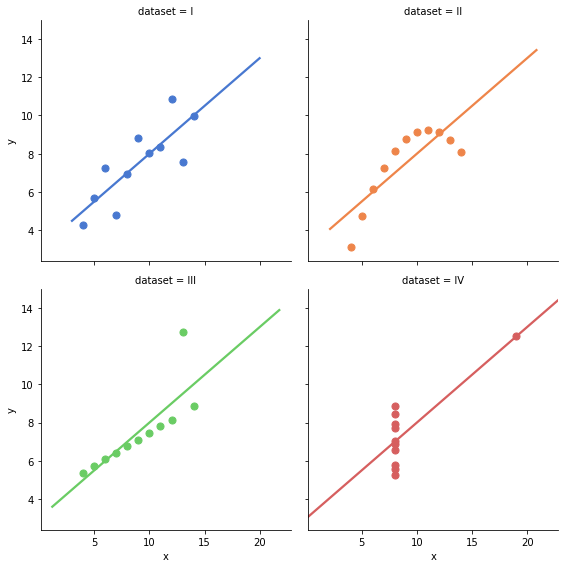

In [9]:
# Showing the results of a linear regression within each dataset
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=df,
           col_wrap=2, ci=None, palette='muted', height=4,
           scatter_kws={'s': 50, 'alpha': 1})

We can see that the linear regression models we trained are all the exact same, but the data that we used to train them are different. There are clearly a few issues here, so let's break these datasets down:

**I:** This was the only legitimate dataset for linear regression in this bunch. Some points deviate from the line, but they do so evenly throughout. This is typical expected behavior of proper linear regression applications.

**II:** This data is not linear, which violates the assumption that there is a linear relationship between the features and the labels. This is where we should introduce polynomial variables to be able to capture this non-linear trend.

**III:** This data has a clear outlier that is throwing off our model. If this point was removed, we should be able to capture the linear model perfectly.

**IV:** This data has both the issues of dataset II and dataset III. Linear regression is not an appropriate model for this because we would only capture the average after throwing out the outlier.

### Summary

TODO: Finish this

## Decision Trees: Classification and Regression Trees (CART)

<img src="https://raw.githubusercontent.com/JeffMacaluso/Talks/master/TheMostImportantModels/images/DecisionTreeIllustration.png">

### What are they?

Decision trees are essentially if/then rules. At each step there is a split on a variable that results in either another split or a prediction. This makes them extremely interpretable because you can determine how predictions were made by following an observation through the tree and you can determine important variables by looking at what the splits were toward the top of the tree.

### How do they work?

For the sake of time we'll focus on classification trees, but regression trees have a similar learning procedure. The dataset has something called a gini score or entropy (both are extremely similar and are basically interchangeable) that tell how "pure" it is. 

If you have a dataset with 100 observations, two classes, and 50% of the observations are one class and 50% of the observations are the other class, you have a gini score of 0.50, thus indicating that it is as un-"pure" as it can be. The first split is determined by scanning through every variable at each possible split to see what minimizes the gini score, which can be described as finding the maximum information gain. For our example, if the split with the maximum information gain results in two nodes with a 30/10 split and a 15/25 split, then they will have gini scores of **TODO: Put scores here**. This process repeats until the specified constraints are met.

Decision trees are notorious for overfitting, so it is often wise to prune them. This means imposing constraints on the size of the decision trees to keep them from just memorizing the training data. We'll go through this in our example.

See [this blog post](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) for a more intuitive understanding on how decision trees learn.

### Decision Tree Example

In this example we'll train a decision tree for the famous Titanic dataset. Each row is a person, and we're going to try to predict if someone is likely to survive given their demographics and other information about their socioeconomic status.

First, we will import the data, remove redundant variables that are captured in other variables, handle missing values by either dropping columns or filling the missing values with either the mean or mode, and preview the first few rows.

In [10]:
# <img src="https://clearpredictions.com/Images/tree-infographic.png" width="1200">

# Loading the dataset
df = sns.load_dataset('titanic')
print(df.shape)

# Removing redundant columns
df.drop(['embarked', 'alive', 'pclass', 'adult_male'], axis=1, inplace=True)

# Handling missing values
df.drop('deck', axis=1, inplace=True)  # Dropping since most observations are missing
df.fillna(df.mean(), axis=0, inplace=True)  # All numerical columns
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)  # Categorical column with text

# Previewing the data frame
df.head()

(891, 15)


,survived,sex,age,sibsp,parch,fare,class,who,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,True


We still have a few preparation steps to do before building our classifier. Sci-kit learn requires inputs to be represented as numbers, so we need to [one-hot encode](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) our categorical variables (this is just making each of our categories having its own column and either a 0 or a 1 for if the observation had that category) and encode our ordinal variables to have a numerical representation.

In [11]:
# Handling categorical variables by one-hot encoding them
# This means making each category its own column with a binary flag
df = pd.get_dummies(df, columns=['sex', 'who', 'embark_town'], drop_first=False)

# Converting the class, an ordinal variable, into numbers
class_mapper = {'Third': 3, 'Second': 2, 'First': 1}
df['class'].replace(class_mapper, inplace=True)

# Converting the last categorical column into a binary integer for consistency
df['alone'] = df['alone'].astype(int)

df.head()

,survived,age,sibsp,parch,fare,class,alone,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,3,0,0,1,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,1,1,0,0
2,1,26.0,0,0,7.9250,3,1,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,3,1,0,1,0,1,0,0,0,1


Our data is now ready to go! This is a famous learning example because it requires a bit of data preparation that other learning datasets often forgo. Specifically, we dealt with missing values, columns we won't be using, categorical variables, and ordinal variables. There is other feature engineering (creating new variables from our current variables) that can be performed, but we will continue for the sake of time.

Next we'll split our data into training and testing sets and fit our un-pruned model.

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Assigning the features and labels to variables before splitting them
features = df.drop('survived', axis=1)
label = df['survived']

# Splitting the observations into a training and a testing set for the holdout method
# Note: k-folds cross validation should be used for a dataset this small in order
#       to obtain a more realistic accuracy. This won't be used for simplicity
#       in this example.
X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.30, random_state=46)

# Instantiating the model
decision_tree_model = DecisionTreeClassifier()

# Fitting the model and timing how long it takes
start_time = time.time()
decision_tree_model.fit(X_train, y_train)
end_time = time.time()

# Calculating the accuracy of our model
# Using model.score() since this will product the accuracy by default
accuracy = decision_tree_model.score(X_test, y_test)

# Reporting how long it takes to fit the model
print('Total time to fit the model:', end_time - start_time)

# Reporting the accuracy
print('Accuracy:', accuracy)

Total time to fit the model: 0.002001523971557617
Accuracy: 0.7985074626865671


That was an extremely quick training time, and we were able to obtain an accuracy of almost 80% on the testing set!

I mentioned earlier that decision trees are highly interpretable since they are a series of if/then rules, so let's plot this decision tree to see what the most important factors are for determining if someone is likely to survive the Titanic tragedy:

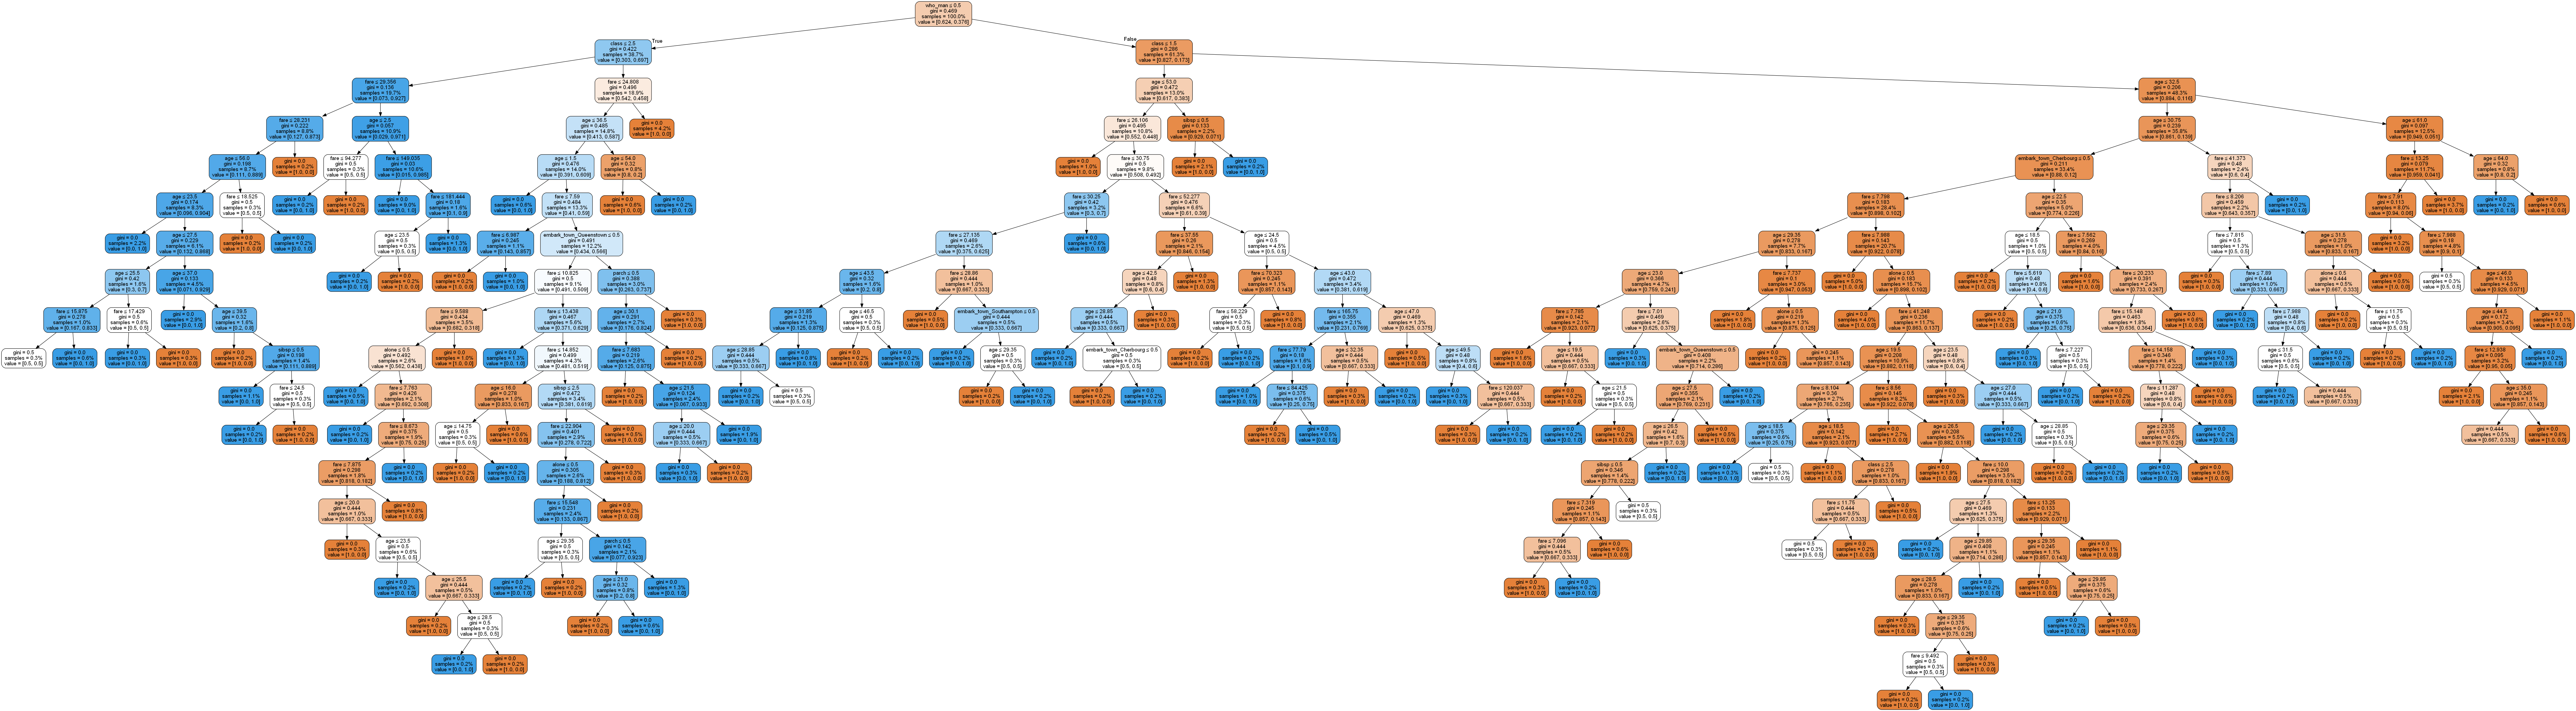

In [31]:
# Visualizing the decision tree
def plot_decision_tree(model, feature_names=None):
    '''
    Plots the decision tree from a scikit-learn DecisionTreeClassifier or DecisionTreeRegressor
    Requires graphviz: https://www.graphviz.org
    
    Notes on decision tree visualization:
        - The Gini score is the level of "impurity" of the node. 
            - Scores closer to 0.5 are more mixed, whereas scores closer to 0 are more homogenous
        - For classification, the colors correspond to different classes
            - The shades are determined by the Gini score. Nodes closer to 0.5 will be lighter.
        - Values contain the number of samples in each category
    
    TODO: Add notes on decision tree visualization for regression
    '''
    from sklearn.externals.six import StringIO  
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus

    dot_data = StringIO()
    
    export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    proportion=True,
                    special_characters=True,
                    feature_names=feature_names)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    
    
plot_decision_tree(decision_tree_model, feature_names=X_train.columns)

Did you get that? Me neither - that's a huge tree so it's difficult to understand what's going on from a cursory glance.

In order to make this more interpretable (and potentially improve the testing accuracy) we will try pruning the tree to different levels. More specifically, we'll restrict the size of our tree by imposing limits on the max depth, which is the number of levels that can exist within the tree. Our above tree has roughly 18 levels for reference.

In [32]:
# Specifying our levels of pruning to try
max_depths_to_try = [2, 3, 4, 5, 6, 7, 8, None]

# Instantiating a list to fill with the test accuracy of our models
test_accuracies = []

# Training the models and storing the test accuracies
for depth in max_depths_to_try:
    decision_tree_model = DecisionTreeClassifier(max_depth=depth)
    decision_tree_model.fit(X_train, y_train)
    accuracy = decision_tree_model.score(X_test, y_test)
    test_accuracies.append(accuracy)
    
# Putting the results into a data frame for viewing the results better
results = pd.DataFrame({'Max Tree Depth': max_depths_to_try, 'Test Accuracy': test_accuracies})

# Sorting the results by the test accuracy
results.sort_values('Test Accuracy', ascending=False)

,Max Tree Depth,Test Accuracy
1,3.0,0.847015
3,5.0,0.839552
2,4.0,0.832090
4,6.0,0.824627
0,2.0,0.817164
7,NaN,0.809701
5,7.0,0.805970
6,8.0,0.798507


This shows that pruning has a positive impact on the generalizability for our problem. Next, let's plot the top performing tree:

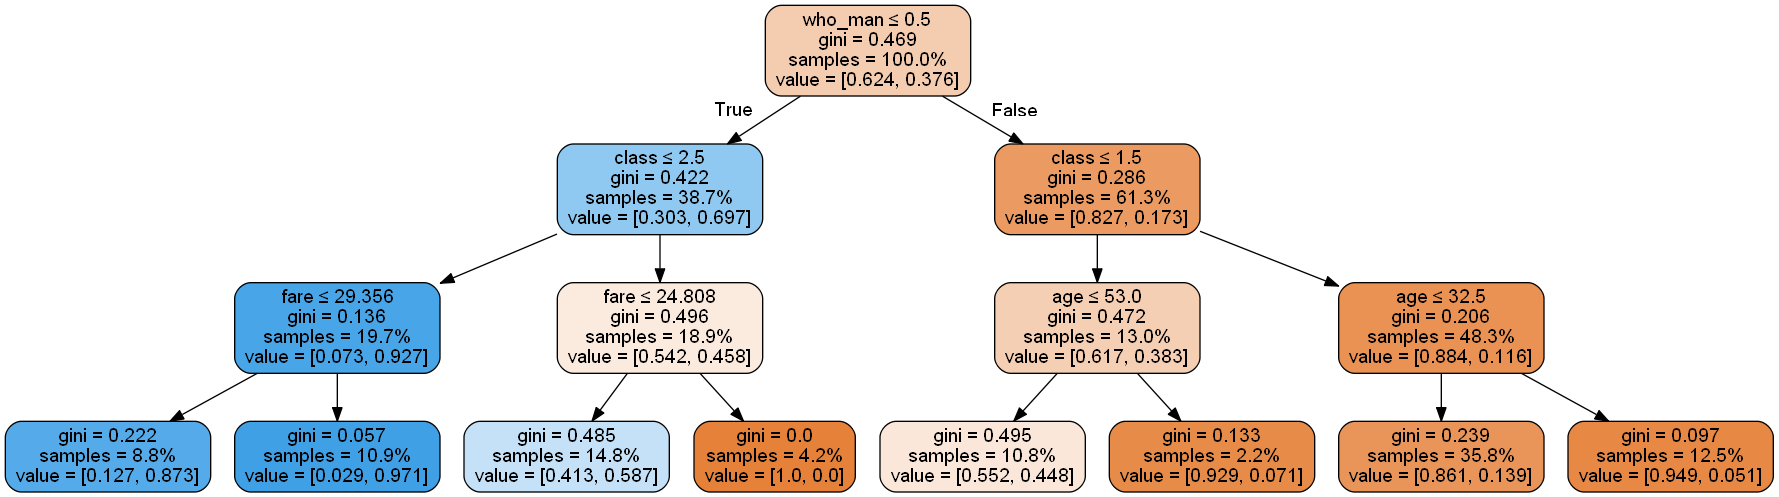

In [33]:
# Re-fitting the top performing model before plotting the tree
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(X_train, y_train)

# Plotting the tree
plot_decision_tree(decision_tree_model, feature_names=X_train.columns)

This tree is significantly easier to understand. This shows us that adult males are the most important variable to split on - this makes a lot of sense given the "women and children" adage. Of the adult men (who only have a 17.3% chance of surviving), the first class passengers have a higher chance of surviving at 38.3%, but the non-first class passengers only have an 11.6% chance of surviving. We can see a similar split on socioeconomic status for our non adult men passengers where passengers in either the first or second class have a 92.7% chance of surviving while third class passengers only have a 45.8% chance of surviving.

One thing to point out on this tree is that you can see that at least one of the child nodes of each split has a lower gini score than the parent node. This illustrates how decision trees continue growing by finding splits that minimize the gini score. You can also see how the above tree begins overfitting with extremely specific rules that result in only a few samples.

**TODO: Summary**

## Random Forests

<img src="https://raw.githubusercontent.com/JeffMacaluso/Talks/master/TheMostImportantModels/images/RandomForestDiagram.png">

TODO: Talk about -
- What they are
- How they work
- Pros: Extremely powerful, very few assumptions, robust to overfitting
- Interpretability
    - Only how much a variable matters
    - Talk about what a black box model is

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Assigning the features and labels to variables before splitting them
features = df.drop('survived', axis=1)
label = df['survived']

# Splitting the observations into a training and a testing set for the holdout method
# Note: k-folds cross validation should be used for a dataset this small in order
#       to obtain a more realistic accuracy. This won't be used for simplicity
#       in this example.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.30, random_state=46)

# Instantiating the model
random_forest_model = RandomForestClassifier(n_estimators=100)

# Fitting the model and timing how long it takes
start_time = time.time()
random_forest_model.fit(X_train, y_train)
end_time = time.time()

# Calculating the accuracy of our model
# Using model.score() since this will product the accuracy by default
accuracy = random_forest_model.score(X_test, y_test)

# Reporting how long it takes to fit the model
print('Total time to fit the model:', end_time - start_time)

# Reporting the accuracy
print('Accuracy:', accuracy)

Total time to fit the model: 0.09499788284301758
Accuracy: 0.8395522388059702


TODO: Talk about robustness to overfitting

In [15]:
# Testing robustness to overfitting by using an increasing number of trees
for num_trees in [10, 100, 1000, 10000]:
    print('Fitting with {0} trees'.format(num_trees))
    
    # Instantiating the model
    random_forest_model = RandomForestClassifier(n_estimators=num_trees,
                                                 n_jobs=-1)  # Parallelizing to all avaiable CPU cores

    # Fitting the model and timing how long it takes
    start_time = time.time()
    random_forest_model.fit(X_train, y_train)
    end_time = time.time()

    # Calculating the accuracy of our model
    # Using model.score() since this will product the accuracy by default
    accuracy = random_forest_model.score(X_test, y_test)

    # Reporting how long it takes to fit the model
    print('Total time to fit the model:', end_time - start_time)

    # Reporting the accuracy
    print('Accuracy:', accuracy)
    print()

Fitting with 10 trees
Total time to fit the model: 0.1119997501373291
Accuracy: 0.832089552238806

Fitting with 100 trees
Total time to fit the model: 0.14599609375
Accuracy: 0.8395522388059702

Fitting with 1000 trees
Total time to fit the model: 1.2239952087402344
Accuracy: 0.835820895522388

Fitting with 10000 trees
Total time to fit the model: 11.862998485565186
Accuracy: 0.835820895522388



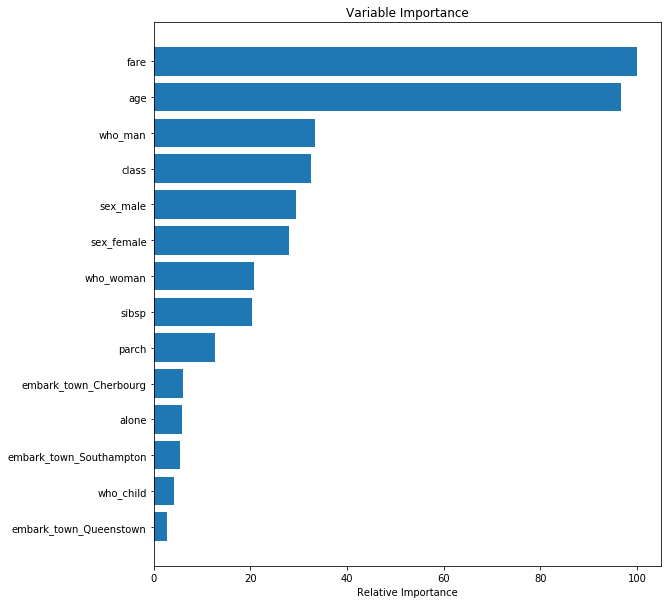

In [16]:
def plot_ensemble_feature_importance(model, features):
    '''
    Plots the feature importance for an ensemble model
    '''
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, features.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    

plot_ensemble_feature_importance(random_forest_model, features)

# Summary

TODO: Fill this out